In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.00, size = 1500)
lngs = np.random.uniform(low = -90.000, high = 90.00, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [14]:
from citipy import citipy

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [16]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city =citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
        

607

In [17]:
# mport the datetime module from the datetime library
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data
city_data=[]
#print the beginning of the logging.
print('Beginning Data Retrieval    ')
print('----------------------------')

# Create counters
record_count =1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 ==0 and i >= 50):
        set_count+=1
        record_count = 1
    # Create endpoint  URL with each city.
    city_url = url +'&q=' + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | dolores
Processing Record 2 of Set 1 | riacho de santana
Processing Record 3 of Set 1 | teeli
Processing Record 4 of Set 1 | port-cartier
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | skibbereen
Processing Record 8 of Set 1 | abu dhabi
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | laguna
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | figueira da foz
Processing Record 14 of Set 1 | manjacaze
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | havelock
Processing Record 17 of Set 1 | ileza
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | ostrovnoy
Processing Record 20 of Set 1 | morro agudo
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | grand river south east
City not fo

Processing Record 34 of Set 4 | nuuk
Processing Record 35 of Set 4 | lebu
Processing Record 36 of Set 4 | rognan
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | sorland
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | southampton
Processing Record 41 of Set 4 | almeirim
Processing Record 42 of Set 4 | yithion
City not found. Skipping...
Processing Record 43 of Set 4 | big rapids
Processing Record 44 of Set 4 | rabo de peixe
Processing Record 45 of Set 4 | natal
Processing Record 46 of Set 4 | athens
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | loubomo
Processing Record 1 of Set 5 | liverpool
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | lodja
Processing Record 4 of Set 5 | mohpa
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | mmabatho
Processing Record 7 of Set 5 | salisbury
Processin

Processing Record 30 of Set 8 | san juan del sur
Processing Record 31 of Set 8 | celano
Processing Record 32 of Set 8 | ambanja
Processing Record 33 of Set 8 | abidjan
Processing Record 34 of Set 8 | lewisville
Processing Record 35 of Set 8 | atasu
Processing Record 36 of Set 8 | loandjili
Processing Record 37 of Set 8 | dalmatovo
Processing Record 38 of Set 8 | yungay
Processing Record 39 of Set 8 | parthenay
Processing Record 40 of Set 8 | nalut
Processing Record 41 of Set 8 | cap-aux-meules
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | petrolina
Processing Record 44 of Set 8 | sistranda
Processing Record 45 of Set 8 | paamiut
Processing Record 46 of Set 8 | umm durman
City not found. Skipping...
Processing Record 47 of Set 8 | bauchi
Processing Record 48 of Set 8 | zheshart
Processing Record 49 of Set 8 | puerto baquerizo moreno
Processing Record 50 of Set 8 | rabat
Processing Record 1 of Set 9 | chakia
Processing Record 2 of Set 9 | apac
Processing Recor

Processing Record 15 of Set 12 | hermsdorf
Processing Record 16 of Set 12 | puerto del rosario
Processing Record 17 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 18 of Set 12 | farafangana
Processing Record 19 of Set 12 | ouesso
Processing Record 20 of Set 12 | bama
Processing Record 21 of Set 12 | garceni
Processing Record 22 of Set 12 | petilia policastro
Processing Record 23 of Set 12 | halifax
Processing Record 24 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 25 of Set 12 | samandag
Processing Record 26 of Set 12 | karasjok
Processing Record 27 of Set 12 | goba
Processing Record 28 of Set 12 | mantua
Processing Record 29 of Set 12 | sylva
Processing Record 30 of Set 12 | jagalur
Processing Record 31 of Set 12 | puerto carreno
Processing Record 32 of Set 12 | kharp
Processing Record 33 of Set 12 | yuryevets
Processing Record 34 of Set 12 | le passage
Processing Record 35 of Set 12 | mocuba
Processing Record 36 of Set 12 | baft
Processing 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dolores,-36.3132,-57.6792,71.35,58,80,5.06,AR,2021-10-25 21:18:01
1,Riacho De Santana,-13.6092,-42.9389,80.28,64,100,4.25,BR,2021-10-25 21:18:02
2,Teeli,51.0333,90.2333,33.01,68,87,1.30,RU,2021-10-25 21:18:02
3,Port-Cartier,50.0334,-66.8654,46.74,65,4,3.47,CA,2021-10-25 21:18:03
4,Kruisfontein,-34.0033,24.7314,61.88,92,4,4.88,ZA,2021-10-25 21:15:32


In [21]:
new_column_order =['City','Country','Date', 'Lat','Lng','Max Temp', 'Humidity','Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dolores,AR,2021-10-25 21:18:01,-36.3132,-57.6792,71.35,58,80,5.06
1,Riacho De Santana,BR,2021-10-25 21:18:02,-13.6092,-42.9389,80.28,64,100,4.25
2,Teeli,RU,2021-10-25 21:18:02,51.0333,90.2333,33.01,68,87,1.30
3,Port-Cartier,CA,2021-10-25 21:18:03,50.0334,-66.8654,46.74,65,4,3.47
4,Kruisfontein,ZA,2021-10-25 21:15:32,-34.0033,24.7314,61.88,92,4,4.88


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

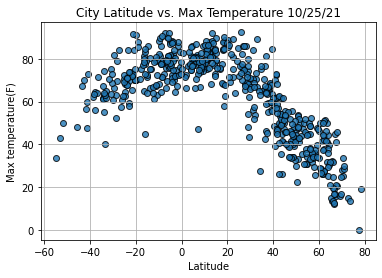

In [33]:
# Import time Module
import time

#Build the scatter plot for latitued vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max temperature(F)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig1.png')          

# Show plot.
plt.show()

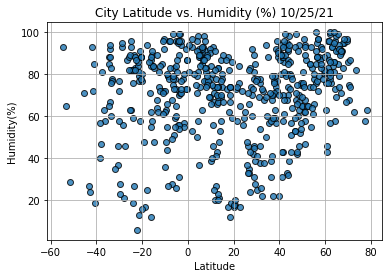

In [38]:
#Build the scatter plot for latitued vs. humiditiy
plt.scatter(lats,
            humidity,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig2.png')          

# Show plot.
plt.show()

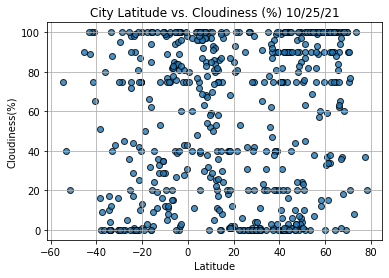

In [39]:
#Build the scatter plot for latitued vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig3.png')          

# Show plot.
plt.show()

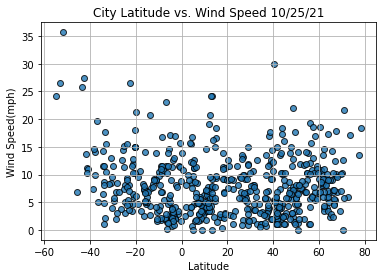

In [40]:
#Build the scatter plot for latitued vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor = 'black',
            linewidth = 1,
            marker = 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

# Save the figure
plt.savefig('weather_data/Fig4.png')          

# Show plot.
plt.show()